In [1]:
include("cutoff.jl")

hitting_time_pr (generic function with 1 method)

0/100000 paths did not converge to 0 within 30 steps.


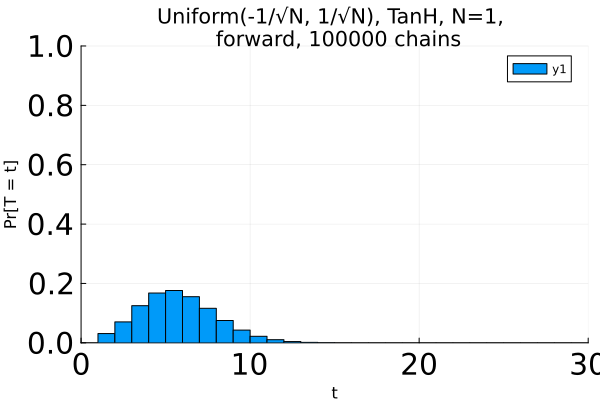

In [7]:
# for N = 1:12
N = 1
X₀_Dist = Uniform(-1, 1)

num_chains = 100000
# Dist = Uniform(-1/√N, 1/√N)
WeightDist = Uniform(-1, 1)
# Dist = Normal(0.0, 1)
# Dist = Normal(0.0, 1/√N)
# activation = σ
activation = tanh
step_size = 0.01
eps = step_size/2
num_steps = 30
forward = true
store_steps = false

Exp = Experiment(X₀_Dist, N, num_chains, WeightDist, activation, step_size, num_steps, forward, store_steps)
times = hitting_times(Exp)

diststr_greek, diststr_nongreek, actstr, dynamicsstr = get_plotting_strs(Exp)

bins = 0:1:num_steps
hist = normalize(fit(Histogram, times, bins), mode=:probability)
# histogram values can be obtained from hist.weights

p = plot(hist,
    title="$diststr_greek, $actstr, N=$N, \n $dynamicsstr, $num_chains chains",
    xlabel="t",
    ylabel="Pr[T = t]",
    fontsize=30,
    tickfontsize=20,
    xlim=(0, num_steps),
    ylim=(0, 1),
)
display(p)
# savefig(p, "imgs/hitting_times/hitting_times $diststr_nongreek $actstr $dynamicsstr N=$N.png")
# end

In [3]:
hist.weights

30-element Vector{Float64}:
 0.0
 0.03
 0.15
 0.11
 0.21
 0.17
 0.17
 0.04
 0.05
 0.05
 0.0
 0.02
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [6]:
hitting_time_pr(4, eps)

0.16417670096358827